In [ ]:
import pandas as pd

notas = pd.read_csv("ratings.csv")
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
notas.columns = ["usuarioId", "filmeId", "nota", "momento"]

In [ ]:
notas['nota'].unique() # Valores de forma unica


array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [ ]:
notas['nota'].value_counts() # Qtas vezes cada nota aparece

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

In [ ]:
notas.shape # Qtas linhas e qtas colunas

(100836, 4)

In [ ]:
notas['nota'].mean()

3.501556983616962

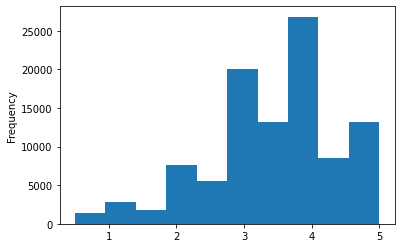

In [ ]:
notas.nota.plot(kind='hist') # Usamos um histograma qdo queremos saber quantas vezes cada informação aparece nesse conjunto de dados

In [ ]:
print("Média",notas['nota'].mean())
print("Mediana",notas['nota'].median())

Média 3.501556983616962
Mediana 3.5


In [ ]:
notas.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

In [ ]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


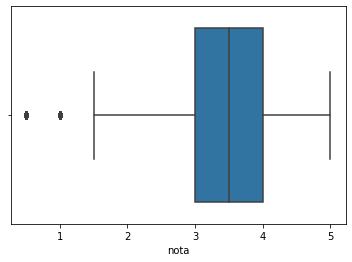

In [ ]:
sns.boxplot(notas.nota)


In [ ]:
filmes = pd.read_csv('movies.csv')

In [ ]:
filmes.columns = ["filmeId", "titulo", "generos"]

In [ ]:
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
notas.query("filmeId	== 1") # Filtrando resultados do FilmeId 1

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483
...,...,...,...,...
97364,606,1,2.5,1349082950
98479,607,1,4.0,964744033
98666,608,1,2.5,1117408267
99497,609,1,3.0,847221025


In [ ]:
notas.query("filmeId==1").nota.mean() # Media da Nota do FilmeId 1 - ToyStory

3.9209302325581397

Analisando algumas notas específicas por filme

In [ ]:
# Como fazer isso para todos os filmes
notas.groupby("filmeId")
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html O que da pra fazer com groupby

In [ ]:
notas.groupby("filmeId").mean()[['nota']]

,nota
filmeId,
1,3.920930
2,3.431818
3,3.259615
4,2.357143
5,3.071429
...,...
193581,4.000000
193583,3.500000
193585,3.500000


In [ ]:
medias_por_filme = notas.groupby("filmeId").mean().nota
medias_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

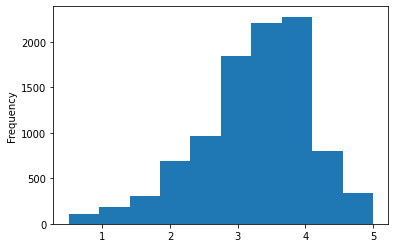

In [ ]:
medias_por_filme.plot(kind="hist")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


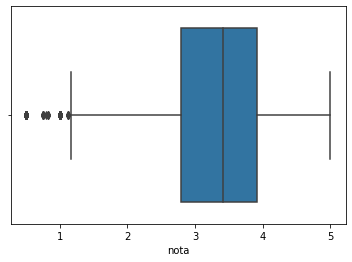

In [ ]:
sns.boxplot(medias_por_filme)

In [ ]:
medias_por_filme.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


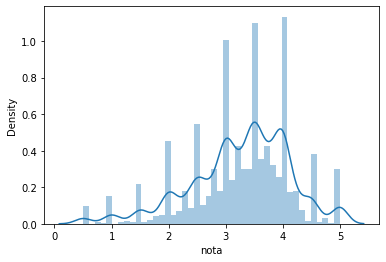

In [ ]:
sns.distplot(medias_por_filme) # Histograma no Seaborn

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


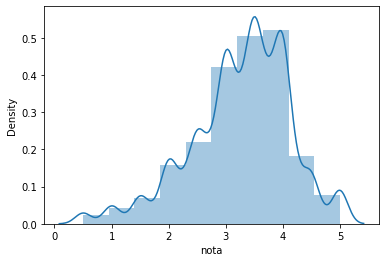

In [ ]:
sns.distplot(medias_por_filme, bins=10) # Reduzir o numero de separações

(array([ 108.,  185.,  309.,  694.,  962., 1840., 2211., 2275.,  798.,
         342.]),
 array([0.5 , 0.95, 1.4 , 1.85, 2.3 , 2.75, 3.2 , 3.65, 4.1 , 4.55, 5.  ]),
 <a list of 10 Patch objects>)

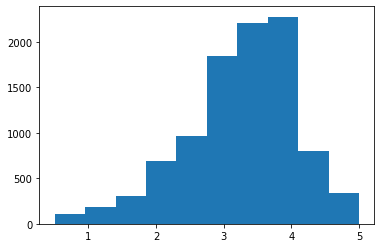

In [ ]:
import matplotlib.pyplot as plt

plt.hist(medias_por_filme)

Text(0.5, 1.0, 'Histograma das médias dos filmes')

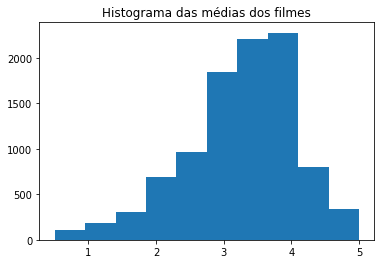

In [ ]:
import matplotlib.pyplot as plt

plt.hist(medias_por_filme)
plt.title("Histograma das médias dos filmes")

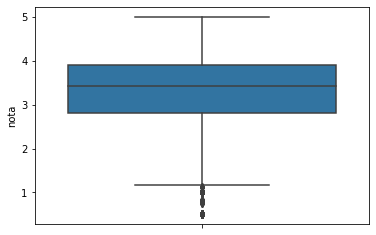

In [ ]:
sns.boxplot(y=medias_por_filme)

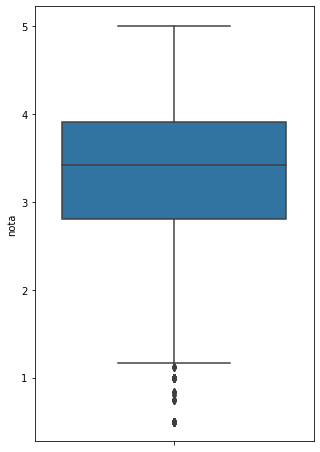

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,8))

sns.boxplot(y=medias_por_filme)

Trabalhando com dados Categoricos

In [ ]:
tmdb = pd.read_csv('tmdb_5000_movies.csv')

In [ ]:
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [ ]:
tmdb.original_language.value_counts()

en    4505
fr      70
es      32
de      27
zh      27
hi      19
ja      16
it      14
cn      12
ko      11
ru      11
pt       9
da       7
sv       5
fa       4
nl       4
he       3
th       3
id       2
ar       2
ro       2
ta       2
cs       2
nb       1
vi       1
tr       1
hu       1
no       1
ky       1
te       1
is       1
pl       1
af       1
sl       1
el       1
ps       1
xx       1
Name: original_language, dtype: int64

In [ ]:
tmdb.original_language.value_counts().to_frame() # Transformar em DataFrame

,original_language
en,4505
fr,70
es,32
de,27
zh,27
hi,19
ja,16
it,14
cn,12
ko,11


In [ ]:
tmdb.original_language.value_counts().to_frame().reset_index() # Transformar o index (idioma) em coluna

,index,original_language
0,en,4505
1,fr,70
2,es,32
3,de,27
4,zh,27
5,hi,19
6,ja,16
7,it,14
8,cn,12
9,ko,11


In [ ]:
contagem_de_lingua = tmdb.original_language.value_counts().to_frame().reset_index()
contagem_de_lingua.columns = ["original_language", "total"] # Renomear as colunas
contagem_de_lingua.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,de,27
4,zh,27


In [ ]:
# https://seaborn.pydata.org/tutorial/categorical.html

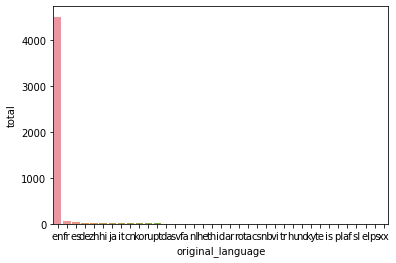

In [ ]:
sns.barplot(x="original_language", y="total", data = contagem_de_lingua)
## atribuiremos a coluna original_language para o eixo x; e total para o eixo y

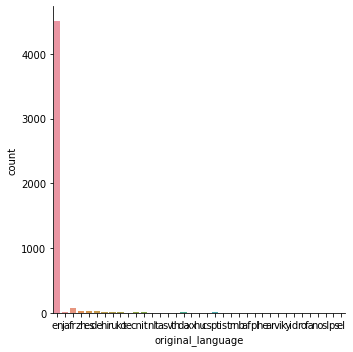

In [ ]:
sns.catplot(x="original_language", kind="count", data=tmdb)

([<matplotlib.patches.Wedge at 0x7f31335ec490>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'en'),
  Text(1.0355355017029462, -0.3710339940124459, 'fr'),
  Text(1.0579676486019882, -0.3011718023181785, 'es'),
  Text(1.0687996606645356, -0.26012936274741094, 'de'),
  Text(1.0773191105706255, -0.22222406260195313, 'zh'),
  Text(1.0835167978583342, -0.18971386021801853, 'hi'),
  Text(1.0875756432724297, -0.16486121484618815, 'ja'),
  Text(1.0906010773146022, -0.14348968659882622, 'it'),
  Text(1.092883487371409, -0.12492270822755745, 'cn'),
  Text(1.0946390911069936, -0.10846778425161549, 'ko'),
  Text(1.0960865535188649, -0.09270527058984593, 'ru'),
  Text(1.0972054830031333, -0.07835896928789601, 'pt'),
  Text(1.097965443340663, -0.06687215586282344, 'da'),
  Text(1.0984565010300316, -0.05825217030171998, 'sv'),
  Text(1.0987803851616647, -0.0517847968421653, 'fa'),
  Text(1.0990363161210686, -0.04603450713357274, 'nl'),
  Text(1.0992355702663055, -0.04100196411527794, 'he'),
  Text

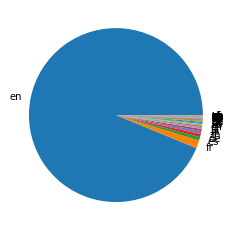

In [ ]:
plt.pie(contagem_de_lingua["total"], labels = contagem_de_lingua["original_language"]) # Como ingles tem mto mais fica dificil visualização

In [ ]:
total_por_lingua = tmdb["original_language"].value_counts()
total_por_lingua.loc["en"]

4505

In [ ]:
total_por_lingua = tmdb["original_language"].value_counts()
total_geral = total_por_lingua.sum()
total_de_ingles = total_por_lingua.loc["en"]
total_do_resto = total_geral - total_de_ingles
print(total_de_ingles, total_do_resto)

4505 298


In [ ]:
dados = {
    'lingua' : ['ingles','outros'],
    'total' : [total_de_ingles, total_do_resto]

}

pd.DataFrame(dados)

,lingua,total
0,ingles,4505
1,outros,298


In [ ]:
dados = {
    'lingua' : ['ingles','outros'],
    'total' : [total_de_ingles, total_do_resto]

}

dados = pd.DataFrame(dados)
dados

,lingua,total
0,ingles,4505
1,outros,298


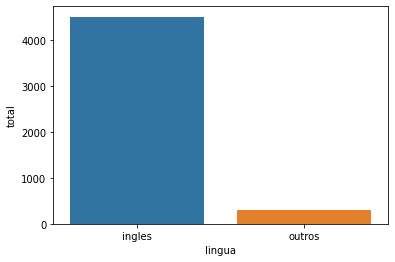

In [ ]:
sns.barplot(data = dados, x = 'lingua', y = 'total') # Representa melhor estes dados do que o de pizza

([<matplotlib.patches.Wedge at 0x7f312a37a110>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'ingles'),
  Text(1.0791697511565306, -0.2130555049482467, 'outros')])

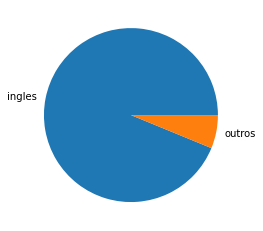

In [ ]:
plt.pie(dados["total"], labels = dados["lingua"])

In [ ]:
filmes_sem_lingua_original_em_ingles = tmdb.query("original_language != 'en'") # Selecionar tudo que não é ingles

In [ ]:
total_por_lingua_de_outros_filmes = tmdb.query("original_language != 'en'").original_language.value_counts()

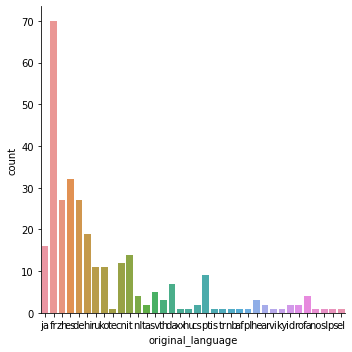

In [ ]:
sns.catplot(x = "original_language", data = filmes_sem_lingua_original_em_ingles, kind="count")

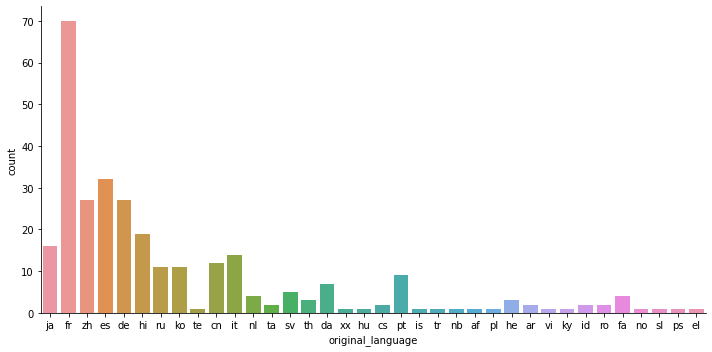

In [ ]:
sns.catplot(x = "original_language", data = filmes_sem_lingua_original_em_ingles, kind="count", aspect=2) # usando o catplot para ajustar o taanho usaos as configurações height=1 (que corresponde à altura) e aspect=1  (são a default)

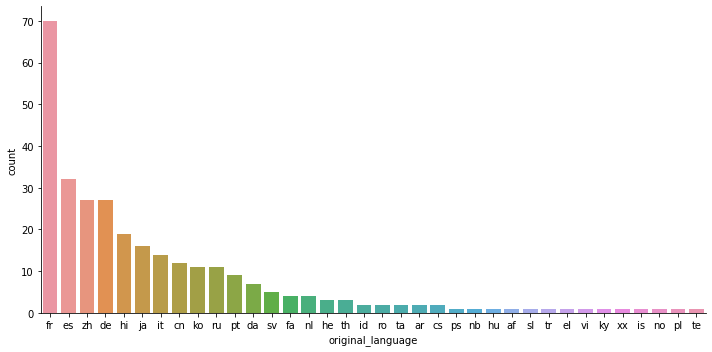

In [ ]:
sns.catplot(x = "original_language", data = filmes_sem_lingua_original_em_ingles,
            kind="count",
            aspect=2,
            order = total_por_lingua_de_outros_filmes.index) # Ordenar por ordem de grandeza usando o value_counts feito anteriormente

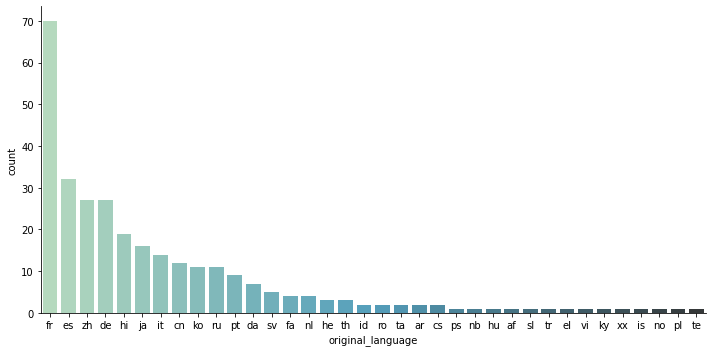

In [ ]:
sns.catplot(x = "original_language", data = filmes_sem_lingua_original_em_ingles,
            kind="count",
            aspect=2,
            palette="GnBu_d", # Ajustando as cores
            order = total_por_lingua_de_outros_filmes.index)

Como fazer graficos de linha

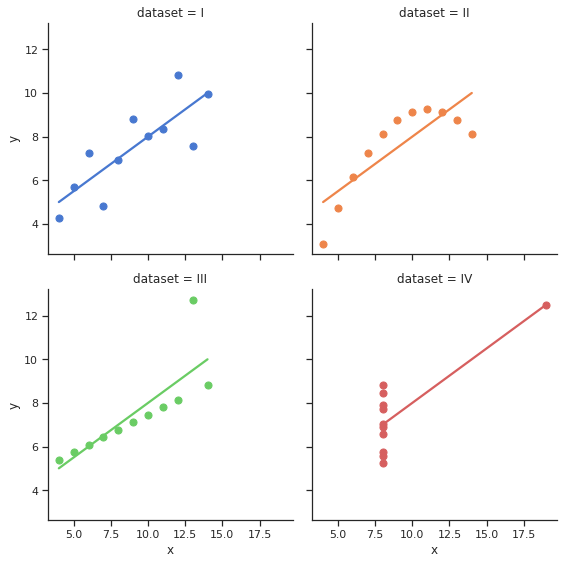

In [ ]:
import seaborn as sns
sns.set(style="ticks")

# Load the example dataset for Anscombe's quartet
df = sns.load_dataset("anscombe")

# Show the results of a linear regression within each dataset
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1})

In [ ]:
filmes.head(2)

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [ ]:
notas_do_toy_story = notas.query("filmeId==1")
notas_do_jumanji = notas.query("filmeId==2")
print(len(notas_do_toy_story), len(notas_do_jumanji)) # Imprimir qtas notas foram dadas

215 110


In [ ]:
print("Nota média do Toy Story %.2f" % notas_do_toy_story.nota.mean())
print("Nota média do Jumanji %.2f" % notas_do_jumanji.nota.mean())

Nota média do Toy Story 3.92
Nota média do Jumanji 3.43


In [ ]:
print("Mediana do Toy Story %.2f" % notas_do_toy_story.nota.median())
print("Mediana do Jumanji %.2f" % notas_do_jumanji.nota.median())

Mediana do Toy Story 4.00
Mediana do Jumanji 3.50


In [ ]:
import numpy as np

np.array([2.5] * 10)

array([2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5])

In [ ]:

np.array([2.5] * 10).mean()

2.5

In [ ]:
filme1 = np.append(np.array([2.5] * 10), np.array([3.5] * 10))

filme2 = np.append(np.array([5] * 10), np.array([1] * 10))

In [ ]:
print(filme1.mean(), filme2.mean())

3.0 3.0


In [ ]:
print(np.median(filme1), np.median(filme2))

3.0 3.0


(array([10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

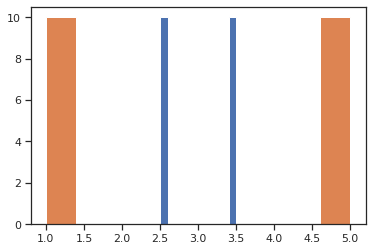

In [ ]:
plt.hist(filme1)
plt.hist(filme2)

{'boxes': [<matplotlib.lines.Line2D at 0x7f31294f7a10>,
 'caps': [<matplotlib.lines.Line2D at 0x7f31294fba90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f3129502ad0>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f3129502590>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f31294f7fd0>,
  <matplotlib.lines.Line2D at 0x7f312950aad0>]}

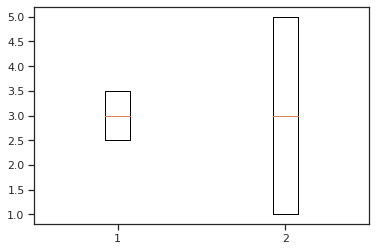

In [ ]:
plt.boxplot([filme1,filme2])

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


{'boxes': [<matplotlib.lines.Line2D at 0x7f3129489750>,
 'caps': [<matplotlib.lines.Line2D at 0x7f312948d790>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f31294947d0>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f3129494290>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f3129489cd0>,
  <matplotlib.lines.Line2D at 0x7f312941d750>]}

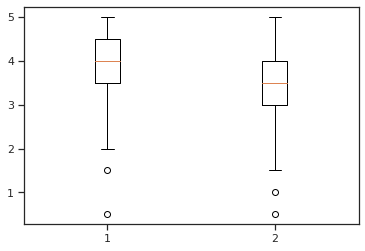

In [ ]:
plt.boxplot([notas_do_toy_story.nota, notas_do_jumanji.nota])

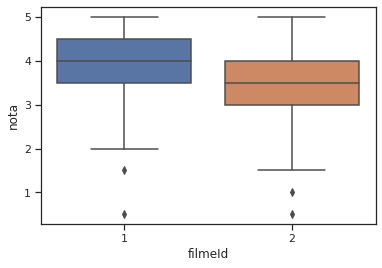

In [ ]:
sns.boxplot(x = "filmeId", y = "nota", data = notas.query("filmeId in (1,2)"))

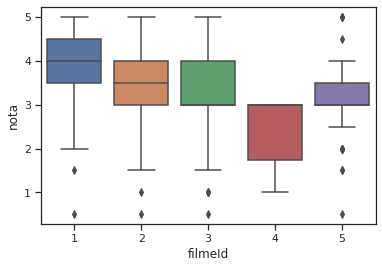

In [ ]:
sns.boxplot(x = "filmeId", y = "nota", data = notas.query("filmeId in (1,2,3,4,5)"))

In [ ]:
print("Desvio padrão do Jumanji %.2f" % notas_do_jumanji.nota.std(), "Desvio padrão do Toy Story %.2f" % notas_do_toy_story.nota.std()) ##tendência de dispersão

Desvio padrão do Jumanji 0.88 Desvio padrão do Toy Story 0.83


In [ ]:
print(np.mean(filme1), np.mean(filme2))
print(np.std(filme1), np.std(filme2))
print(np.median(filme1), np.median(filme2))

3.0 3.0
0.5 2.0
3.0 3.0
